In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data= pd.read_csv('dataset.csv')
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


In [3]:
#finding the number of unique values
data.nunique()

business_code                 6
cust_number                1425
name_customer              4197
clear_date                  403
buisness_year                 2
doc_id                    48839
posting_date                506
document_create_date        507
document_create_date.1      506
due_in_date                 547
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         44349
baseline_create_date        506
cust_payment_terms           74
invoice_id                48833
isOpen                        2
dtype: int64

In [4]:
data.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

In [5]:
data1=data[data['clear_date'].notnull()].copy()
data1.shape
#I am dividing my data into data1 where clear dates are given


(40000, 19)

In [6]:
data1.head()


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0
5,CA02,0140106181,THE corporation,2019-12-04 00:00:00,2019.0,2.960581e+09,2019-09-20,20190920,20190920,20191004.0,CAD,RV,1.0,NaN,22225.84,20190924.0,CA10,2.960581e+09,0


In [7]:
#so see there are no null values for clearing dates in our data1

In [8]:
data1.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             40000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

In [9]:
data_null=data[data['clear_date'].isnull()].copy()
data_null

#drop_null have those values where clear_date is null

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
7,U001,0200744019,TARG us,NaN,2020.0,1.930659e+09,2020-03-19,20200318,20200319,20200403.0,USD,RV,1.0,NaN,11173.02,20200319.0,NAA8,1.930659e+09,1
10,U001,0200418007,AM,NaN,2020.0,1.930611e+09,2020-03-11,20200306,20200311,20200326.0,USD,RV,1.0,NaN,3525.59,20200311.0,NAA8,1.930611e+09,1
14,U001,0200739534,OK systems,NaN,2020.0,1.930788e+09,2020-04-15,20200415,20200415,20200430.0,USD,RV,1.0,NaN,121105.65,20200415.0,NAA8,1.930788e+09,1
15,U001,0200353024,DECA corporation,NaN,2020.0,1.930817e+09,2020-04-23,20200423,20200423,20200426.0,USD,RV,1.0,NaN,3726.06,20200416.0,NAM2,1.930817e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930625e+09,2020-03-10,20200309,20200310,20200325.0,USD,RV,1.0,NaN,13114.99,20200310.0,NAH4,1.930625e+09,1
49980,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930851e+09,2020-05-03,20200502,20200503,20200518.0,USD,RV,1.0,NaN,8899.71,20200503.0,NAH4,1.930851e+09,1
49982,U001,0200148860,DOLLA co,NaN,2020.0,1.930638e+09,2020-03-11,20200311,20200311,20200326.0,USD,RV,1.0,NaN,4967.06,20200311.0,NAA8,1.930638e+09,1
49992,U001,0200900909,SYSCO co,NaN,2020.0,1.930702e+09,2020-03-25,20200325,20200325,20200409.0,USD,RV,1.0,NaN,1998.64,20200325.0,NAA8,1.930702e+09,1


In [10]:
data_null.nunique()
#checking the number og unique values

business_code                6
cust_number                694
name_customer             1766
clear_date                   0
buisness_year                1
doc_id                    9681
posting_date                83
document_create_date        91
document_create_date.1      83
due_in_date                124
invoice_currency             2
document type                1
posting_id                   1
area_business                0
total_open_amount         9079
baseline_create_date        83
cust_payment_terms          43
invoice_id                9681
isOpen                       1
dtype: int64

In [11]:
data_nat=data_null.copy()
# I will use this data_nat at last where Ill predict the expected payment date (clear date of the null values in the data).

In [12]:
data1.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

# Preprocessing 

In [13]:
data_null.drop('clear_date',axis=1,inplace=True)

# dropping the clear date in data_null because thats a null column and
#we hav to predict that value.

In [14]:
dates=['due_in_date','document_create_date','document_create_date.1','baseline_create_date']
dates1=['clear_date','due_in_date','document_create_date','document_create_date.1','baseline_create_date']

#making date and dates1 list sepeartly for conversion of dates column to int str then to datetime datatype 
# because direct conversion give my default value of 1970-01-01

In [15]:
doc_c_date1=data1['document_create_date.1']=data1['document_create_date.1'].astype('int')
doc_c_date=data1['document_create_date']=data1['document_create_date'].astype('int')

# here i stored two column of data1 into variables so thta later i can find correlation btw them.
#and i can only correlate numeric data but later these column are getting converted to string which creates a problem

In [16]:
for x in data1[dates]:
    data1[dates]=data1[dates].astype('int')
for x in data_null[dates]:
    data_null[dates]=data_null[dates].astype('int')
    
#earlier I wrote a code to manually convert the dates to int but it looked so unlike python and so later I wrote a for loop.

In [17]:
for x in data1[dates1]:
    data1[dates1]=data1[dates1].astype('str')
for x in data_null[dates]:
    data_null[dates]=data_null[dates].astype('str')

In [18]:
#converting to Datetime datatype

data1['due_in_date']=pd.to_datetime(data1['due_in_date'],format='%Y-%m-%d').dt.date
data1['clear_date']=pd.to_datetime(data1['clear_date'],format='%Y-%m-%d').dt.date
data1['document_create_date']=pd.to_datetime(data1['document_create_date'],format='%Y-%m-%d').dt.date
data1['document_create_date.1']=pd.to_datetime(data1['document_create_date.1'],format='%Y-%m-%d').dt.date
data1['posting_date']=pd.to_datetime(data1['posting_date'],format='%Y-%m-%d').dt.date
data1['baseline_create_date']=pd.to_datetime(data1['baseline_create_date'],format='%Y-%m-%d').dt.date


In [19]:
#converting to Datetime datatype

data_null['due_in_date']=pd.to_datetime(data_null['due_in_date'],format='%Y-%m-%d').dt.date
#data_null['clear_date']=pd.to_datetime(data_null['clear_date'],format='%Y-%m-%d').dt.date
data_null['document_create_date']=pd.to_datetime(data_null['document_create_date'],format='%Y-%m-%d').dt.date
data_null['document_create_date.1']=pd.to_datetime(data_null['document_create_date.1'],format='%Y-%m-%d').dt.date
data_null['posting_date']=pd.to_datetime(data_null['posting_date'],format='%Y-%m-%d').dt.date
data_null['baseline_create_date']=pd.to_datetime(data_null['baseline_create_date'],format='%Y-%m-%d').dt.date


In [20]:
data1[data1['invoice_id'].isnull()].shape

(6, 19)

In [21]:
data_null

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
3,CA02,0140105686,SYSC llc,2020.0,2.960623e+09,2020-03-30,2020-03-30,2020-03-30,2020-04-10,CAD,RV,1.0,NaN,3299.70,2020-03-31,CA10,2.960623e+09,1
7,U001,0200744019,TARG us,2020.0,1.930659e+09,2020-03-19,2020-03-18,2020-03-19,2020-04-03,USD,RV,1.0,NaN,11173.02,2020-03-19,NAA8,1.930659e+09,1
10,U001,0200418007,AM,2020.0,1.930611e+09,2020-03-11,2020-03-06,2020-03-11,2020-03-26,USD,RV,1.0,NaN,3525.59,2020-03-11,NAA8,1.930611e+09,1
14,U001,0200739534,OK systems,2020.0,1.930788e+09,2020-04-15,2020-04-15,2020-04-15,2020-04-30,USD,RV,1.0,NaN,121105.65,2020-04-15,NAA8,1.930788e+09,1
15,U001,0200353024,DECA corporation,2020.0,1.930817e+09,2020-04-23,2020-04-23,2020-04-23,2020-04-26,USD,RV,1.0,NaN,3726.06,2020-04-16,NAM2,1.930817e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,WAL-MAR in,2020.0,1.930625e+09,2020-03-10,2020-03-09,2020-03-10,2020-03-25,USD,RV,1.0,NaN,13114.99,2020-03-10,NAH4,1.930625e+09,1
49980,U001,0200769623,WAL-MAR corporation,2020.0,1.930851e+09,2020-05-03,2020-05-02,2020-05-03,2020-05-18,USD,RV,1.0,NaN,8899.71,2020-05-03,NAH4,1.930851e+09,1
49982,U001,0200148860,DOLLA co,2020.0,1.930638e+09,2020-03-11,2020-03-11,2020-03-11,2020-03-26,USD,RV,1.0,NaN,4967.06,2020-03-11,NAA8,1.930638e+09,1
49992,U001,0200900909,SYSCO co,2020.0,1.930702e+09,2020-03-25,2020-03-25,2020-03-25,2020-04-09,USD,RV,1.0,NaN,1998.64,2020-03-25,NAA8,1.930702e+09,1


In [22]:
data1

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-01-25,2020-01-26,2020-02-10,USD,RV,1.0,NaN,54273.28,2020-01-26,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-07-22,2019-07-22,2019-08-11,USD,RV,1.0,NaN,79656.60,2019-07-22,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-14,2019-09-14,2019-09-29,USD,RV,1.0,NaN,2253.86,2019-09-14,NAA8,1.929874e+09,0
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-13,2019-11-13,2019-11-28,USD,RV,1.0,NaN,33133.29,2019-11-13,NAH4,1.930148e+09,0
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-09-20,2019-09-20,2019-10-04,CAD,RV,1.0,NaN,22225.84,2019-09-24,CA10,2.960581e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019-07-25,2019.0,1.929601e+09,2019-07-10,2019-07-09,2019-07-10,2019-07-25,USD,RV,1.0,NaN,84780.40,2019-07-10,NAC6,1.929601e+09,0
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-14,2019-08-15,2019-08-30,USD,RV,1.0,NaN,6766.54,2019-08-15,NAH4,1.929744e+09,0
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-02-18,2020-02-19,2020-03-05,USD,RV,1.0,NaN,6120.86,2020-02-19,NAA8,1.930537e+09,0
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-11-26,2019-11-27,2019-12-12,USD,RV,1.0,NaN,63.48,2019-11-27,NAA8,1.930199e+09,0


In [23]:
#checking for errors in the data 

data[data['due_in_date']<data['baseline_create_date']].shape

(0, 19)

In [24]:
#checking for errors in the data 

data1[data1['clear_date']<data1['baseline_create_date']].shape

#here we got 8 rows where clear data is smaller than create date
#how is this even possible , it has to be an error.


(2, 19)

In [25]:
#since there is no clear date in data_null so there is no need to check for the anomalys

In [26]:
data1.shape

(40000, 19)

In [27]:
data_null.shape

(10000, 18)

In [28]:
#removing the anomalys from the data1 dataset.
data1.drop(data1[data1['clear_date']<data1['baseline_create_date']].index,index=None,inplace=True)
data1.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-01-25,2020-01-26,2020-02-10,USD,RV,1.0,NaN,54273.28,2020-01-26,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-07-22,2019-07-22,2019-08-11,USD,RV,1.0,NaN,79656.60,2019-07-22,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-14,2019-09-14,2019-09-29,USD,RV,1.0,NaN,2253.86,2019-09-14,NAA8,1.929874e+09,0
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-13,2019-11-13,2019-11-28,USD,RV,1.0,NaN,33133.29,2019-11-13,NAH4,1.930148e+09,0
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-09-20,2019-09-20,2019-10-04,CAD,RV,1.0,NaN,22225.84,2019-09-24,CA10,2.960581e+09,0


In [29]:
data1.shape

(39998, 19)

In [30]:
# we are going o remove this column and also the correlation btw invoice id and dco id is .999 which means they are highly correlated
#thats why well drop this column.

'''#removing duplicate invoice ids as I think two bills cant have same invoice number
#this has to be a mistake.

data1.drop_duplicates('invoice_id',keep='first',inplace=True)
data1.shape
'''


"#removing duplicate invoice ids as I think two bills cant have same invoice number\n#this has to be a mistake.\n\ndata1.drop_duplicates('invoice_id',keep='first',inplace=True)\ndata1.shape\n"

In [31]:
# making the delay column

data1['delay']=(data1['clear_date']-data1['due_in_date']).dt.days

In [32]:
data1.sort_values(by='document_create_date.1',inplace=True,ignore_index=1,ascending=True)

# sorting the data wrt to document_create_date1

In [33]:
data1.describe()

,buisness_year,doc_id,posting_id,area_business,total_open_amount,invoice_id,isOpen,delay
count,39998.000000,3.999800e+04,39998.0,0.0,39998.000000,3.999200e+04,39998.0,39998.000000
mean,2019.132132,2.013481e+09,1.0,NaN,32061.969706,2.012358e+09,0.0,0.838442
std,0.338638,2.931565e+08,0.0,NaN,39524.195911,2.784660e+08,0.0,10.831443
min,2019.000000,1.928502e+09,1.0,NaN,0.790000,1.928502e+09,0.0,-89.000000
25%,2019.000000,1.929181e+09,1.0,NaN,4702.905000,1.929181e+09,0.0,-3.000000
50%,2019.000000,1.929733e+09,1.0,NaN,17283.500000,1.929733e+09,0.0,0.000000
75%,2019.000000,1.930209e+09,1.0,NaN,46542.090000,1.930208e+09,0.0,2.000000
max,2020.000000,9.500000e+09,1.0,NaN,668593.360000,2.960617e+09,0.0,204.000000


Text(0, 0.5, 'density')

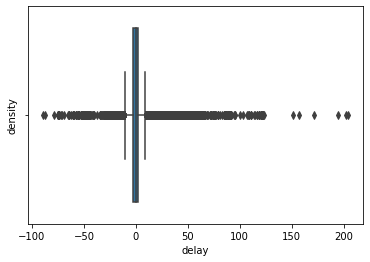

In [34]:
import seaborn as sns
sns.boxplot(x=data1['delay'])
plt.ylabel("density")

# this graph show the density of delays 
# max people submitted the payment with 0 delay

# and we can spot some outliers too

Text(0.5, 1.0, 'delay range')

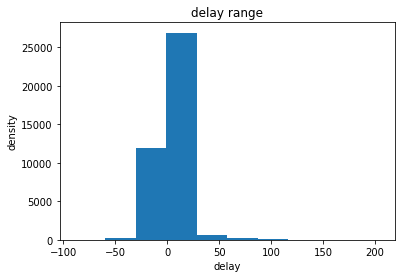

In [35]:
plt.hist(data1['delay'])
plt.xlabel("delay")
plt.ylabel("density")
plt.title("delay range")

#### using IQR to spot and remove outliers in the dataset

In [36]:
#after many hit and trial i was able to fing my Q3 values to successfully point out my outliers

Q1 = np.percentile(data1['delay'], 1 )  
Q2 = np.percentile(data1['delay'], 50)  
Q3 = np.percentile(data1['delay'], 99.74)

print('Q1 25 percentile of the given data is, ', Q1) 
print('Q1 50 percentile of the given data is, ', Q2) 
print('Q1 75 percentile of the given data is, ', Q3)

Q1 25 percentile of the given data is,  -19.0
Q1 50 percentile of the given data is,  0.0
Q1 75 percentile of the given data is,  90.0


In [37]:
IQR = Q3 - Q1  
print('Interquartile range is', IQR)

Interquartile range is 109.0


In [38]:
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
print('low_limit is', low_lim) 
print('up_limit is', up_lim)

low_limit is -182.5
up_limit is 253.5


In [39]:
outlier =[] 
for x in data1['delay']: 
    if ((x> up_lim) or (x<low_lim)): 
         outlier.append(x) 
print(' outlier in the dataset is', outlier)

 outlier in the dataset is []


In [40]:
# remove outliers in delay 

data1.drop(data1[data1['delay']>up_lim].index,index=None,inplace=True)

<AxesSubplot:xlabel='delay'>

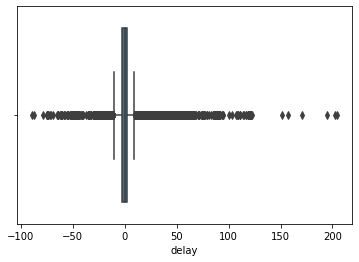

In [41]:
sns.boxplot(x=data1['delay'])

# Train Test Split

In [42]:
data["cust_number"].value_counts()

0200769623    11483
0200726979     1885
0200762301     1557
0200759878     1395
0200794332     1142
              ...  
0140105192        1
0200389625        1
0100043880        1
0140103413        1
200274078         1
Name: cust_number, Length: 1425, dtype: int64

In [43]:
 data1.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,U001,0200726979,BJ'S systems,2019-01-15,2019.0,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,58.18,2018-12-30,NAA8,1.928538e+09,0,1
1,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,20695.38,2018-12-30,NAH4,1.928541e+09,0,-5
2,U001,0200794332,COST foundation,2019-01-23,2019.0,1.928523e+09,2018-12-30,2018-12-31,2018-12-30,2019-01-14,USD,RV,1.0,NaN,8041.59,2018-12-30,NAAX,1.928523e+09,0,9
3,U001,0200769623,WAL-MAR associates,2019-01-16,2019.0,1.928534e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,344.91,2018-12-30,NAH4,1.928534e+09,0,2
4,U001,0200769623,WAL-MAR in,2019-01-11,2019.0,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,NaN,43689.83,2018-12-30,NAH4,1.928543e+09,0,-3


In [44]:
X=data1.drop('delay',axis=1)
y=data1['delay']
data1.shape

(39998, 20)

#### applying Train Test split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test =train_test_split(X,y,shuffle=False,test_size=0.2)

In [47]:
X_train.shape , X_test.shape

#((37134, 20), (9284, 20))

((31998, 19), (8000, 19))

#### splitting X_test into X-validation and X_test1

In [48]:
X_val, X_test1,y_val,y_test1 = train_test_split(X_test,y_test,test_size=.50,shuffle=False)
X_val.shape , X_test1.shape

#((4642, 20), (4642, 20))

((4000, 19), (4000, 19))

*****************************************************************

# EDA

#### lets do some Data Analysis and Visulaization

In [49]:
X_train['delay']=pd.DataFrame(y_train,X_train.index)

<AxesSubplot:xlabel='document_create_date.1', ylabel='delay'>

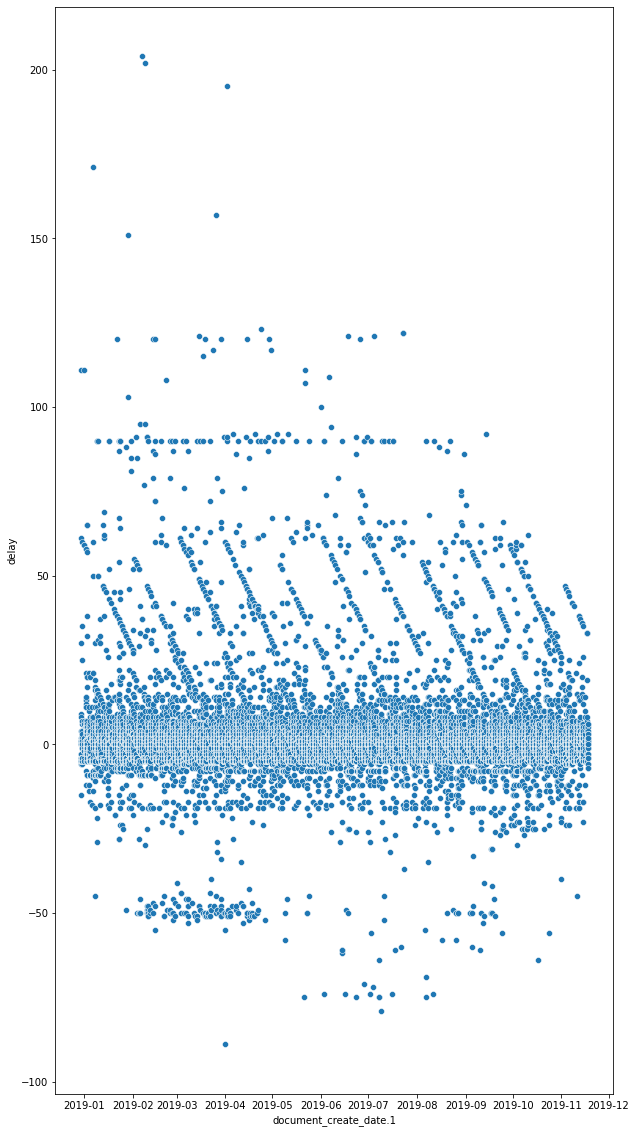

In [50]:
plt.figure(figsize=(10,20))
sns.scatterplot(X_train['document_create_date.1'],X_train['delay'])


In [51]:
map_cust_num=X_train.groupby("cust_number")['delay'].mean().to_dict()

X_train['mean_delay']=X_train['cust_number'].map(map_cust_num)

In [52]:
X_val['mean_delay']=X_val['cust_number'].map(map_cust_num)
X_val['mean_delay'][X_val['mean_delay'].isnull()]= X_train['delay'].mean()

In [53]:
X_test1['mean_delay']=X_test1['cust_number'].map(map_cust_num)
X_test1['mean_delay'][X_test1['mean_delay'].isnull()]= X_train['delay'].mean()

In [54]:
X_train['delay'].mean()

1.0252203262703918

In [55]:
data_null['mean_delay']=data_null['cust_number'].map(map_cust_num)
data_null['mean_delay'][data_null['mean_delay'].isnull()]= X_train['delay'].mean()

In [56]:
#removing some constant columns:- 

X_train.drop(columns=['posting_id', 'area_business','isOpen','document_create_date','posting_date','name_customer'],axis=1,inplace=True)
X_test1.drop(columns=['posting_id', 'area_business','isOpen','document_create_date','posting_date','name_customer'],axis=1,inplace=True)
X_val.drop(columns=['posting_id', 'area_business','isOpen','document_create_date','posting_date','name_customer'],axis=1,inplace=True)


In [57]:
data_null.drop(columns=['posting_id', 'area_business','isOpen','document_create_date','posting_date','name_customer'],axis=1,inplace=True)
data_null.shape

(10000, 13)

In [58]:
data_null

,business_code,cust_number,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,mean_delay
3,CA02,0140105686,2020.0,2.960623e+09,2020-03-30,2020-04-10,CAD,RV,3299.70,2020-03-31,CA10,2.960623e+09,6.522124
7,U001,0200744019,2020.0,1.930659e+09,2020-03-19,2020-04-03,USD,RV,11173.02,2020-03-19,NAA8,1.930659e+09,2.849117
10,U001,0200418007,2020.0,1.930611e+09,2020-03-11,2020-03-26,USD,RV,3525.59,2020-03-11,NAA8,1.930611e+09,-0.908815
14,U001,0200739534,2020.0,1.930788e+09,2020-04-15,2020-04-30,USD,RV,121105.65,2020-04-15,NAA8,1.930788e+09,1.759124
15,U001,0200353024,2020.0,1.930817e+09,2020-04-23,2020-04-26,USD,RV,3726.06,2020-04-16,NAM2,1.930817e+09,-4.152174
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,2020.0,1.930625e+09,2020-03-10,2020-03-25,USD,RV,13114.99,2020-03-10,NAH4,1.930625e+09,-2.260712
49980,U001,0200769623,2020.0,1.930851e+09,2020-05-03,2020-05-18,USD,RV,8899.71,2020-05-03,NAH4,1.930851e+09,-2.260712
49982,U001,0200148860,2020.0,1.930638e+09,2020-03-11,2020-03-26,USD,RV,4967.06,2020-03-11,NAA8,1.930638e+09,-5.490099
49992,U001,0200900909,2020.0,1.930702e+09,2020-03-25,2020-04-09,USD,RV,1998.64,2020-03-25,NAA8,1.930702e+09,1.463768


In [59]:
X_train

,business_code,cust_number,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay,mean_delay
0,U001,0200726979,2019-01-15,2019.0,1.928538e+09,2018-12-30,2019-01-14,USD,RV,58.18,2018-12-30,NAA8,1.928538e+09,1,0.956110
1,U001,0200769623,2019-01-09,2019.0,1.928541e+09,2018-12-30,2019-01-14,USD,RV,20695.38,2018-12-30,NAH4,1.928541e+09,-5,-2.260712
2,U001,0200794332,2019-01-23,2019.0,1.928523e+09,2018-12-30,2019-01-14,USD,RV,8041.59,2018-12-30,NAAX,1.928523e+09,9,-0.185131
3,U001,0200769623,2019-01-16,2019.0,1.928534e+09,2018-12-30,2019-01-14,USD,RV,344.91,2018-12-30,NAH4,1.928534e+09,2,-2.260712
4,U001,0200769623,2019-01-11,2019.0,1.928543e+09,2018-12-30,2019-01-14,USD,RV,43689.83,2018-12-30,NAH4,1.928543e+09,-3,-2.260712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31993,U001,0200785971,2019-12-23,2019.0,1.930169e+09,2019-11-18,2019-12-20,USD,RV,6985.28,2019-11-18,NA32,1.930169e+09,3,1.762712
31994,U001,0200782669,2019-12-09,2019.0,1.930166e+09,2019-11-18,2019-12-03,USD,RV,8649.76,2019-11-18,NAA8,1.930166e+09,6,-0.103093
31995,U001,0200741831,2019-12-05,2019.0,1.930168e+09,2019-11-18,2019-12-03,USD,RV,50364.28,2019-11-18,NAA8,1.930168e+09,2,3.388889
31996,U001,0200726979,2019-12-03,2019.0,1.930170e+09,2019-11-18,2019-12-03,USD,RV,195.46,2019-11-18,NAA8,1.930170e+09,0,0.956110


#### finding correlation between independent variables

In [60]:
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [61]:
pearsonr(doc_c_date,doc_c_date1)

(0.9869898473092862, 0.0)

<AxesSubplot:title={'center':'doc create date vs doc create date1 (r=0.986990)'}, xlabel='document_create_date', ylabel='document_create_date.1'>

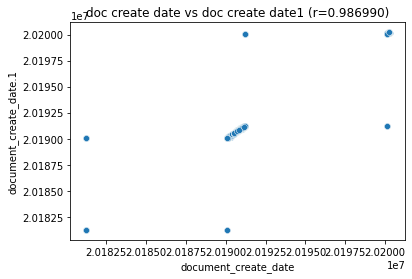

In [62]:
plt.title("doc create date vs doc create date1 (r={0:02f})".format(pearsonr(doc_c_date,doc_c_date1)[0]))
sns.scatterplot(x=doc_c_date,y=doc_c_date1,data=data1)

# doc_c_date1 and doc_c_date are defined above.

# as we can see the data is highly correlated. the Graph is linear with some outliers.
#since these are independent variable , we can drop one of them from our feature lit.

<AxesSubplot:title={'center':'due day vs delay'}, xlabel='total_open_amount', ylabel='delay'>

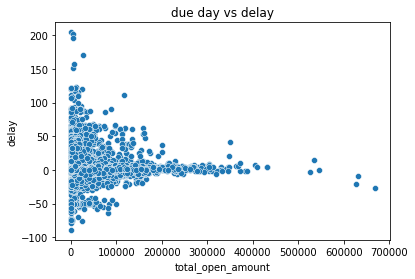

In [63]:
plt.title("due day vs delay".format(X_train['total_open_amount'],y_train))
sns.scatterplot(x=X_train['total_open_amount'],y=y_train)

In [64]:
data1

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,U001,0200726979,BJ'S systems,2019-01-15,2019.0,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,58.18,2018-12-30,NAA8,1.928538e+09,0,1
1,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,20695.38,2018-12-30,NAH4,1.928541e+09,0,-5
2,U001,0200794332,COST foundation,2019-01-23,2019.0,1.928523e+09,2018-12-30,2018-12-31,2018-12-30,2019-01-14,USD,RV,1.0,NaN,8041.59,2018-12-30,NAAX,1.928523e+09,0,9
3,U001,0200769623,WAL-MAR associates,2019-01-16,2019.0,1.928534e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,344.91,2018-12-30,NAH4,1.928534e+09,0,2
4,U001,0200769623,WAL-MAR in,2019-01-11,2019.0,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,NaN,43689.83,2018-12-30,NAH4,1.928543e+09,0,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39993,U001,0200714710,SYSCO in,2020-03-16,2020.0,1.930576e+09,2020-02-26,2020-02-27,2020-02-26,2020-03-12,USD,RV,1.0,NaN,8452.06,2020-02-26,NAA8,1.930576e+09,0,4
39994,U001,0100031704,DELHAIZE associates,2020-03-12,2020.0,1.930566e+09,2020-02-26,2020-02-25,2020-02-26,2020-05-01,USD,RV,1.0,NaN,14443.35,2020-02-26,NAGD,1.930566e+09,0,-50
39995,U001,0200418007,AM associates,2020-03-19,2020.0,1.930568e+09,2020-02-27,2020-02-25,2020-02-27,2020-03-13,USD,RV,1.0,NaN,10349.36,2020-02-27,NAA8,1.930568e+09,0,6
39996,U001,0200739044,PERFOR corporation,2020-03-16,2020.0,1.930574e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,USD,RV,1.0,NaN,25143.02,2020-02-27,NAA8,1.930574e+09,0,3


# Feature Engineering

'''X_tt=X_train.copy()
#droping nulls from invoice id :-
X_tt.dropna(subset=['invoice_id'],inplace=True)

#checking correlation between invoice_id and doc_id

from scipy.stats import pearsonr
pearsonr(X_tt['invoice_id'],X_tt['doc_id'])'''

In [65]:
#high corr btw independent vars so we can safely drop ione of them

X_train.drop(['invoice_id'],axis=1,inplace=True)
X_test1.drop(['invoice_id'],axis=1,inplace=True)
X_val.drop(['invoice_id'],axis=1,inplace=True)

#and since there are all unique values in doc id so removing that too wont affect our model

X_train.drop(['doc_id'],axis=1,inplace=True)
X_test1.drop(['doc_id'],axis=1,inplace=True)
X_val.drop(['doc_id'],axis=1,inplace=True)

In [66]:
#doing the same with data_null

data_null.drop(['invoice_id'],axis=1,inplace=True)
data_null.drop(['doc_id'],axis=1,inplace=True)

#### making features from due date

In [67]:
X_train['due_dt_week']=pd.to_datetime(X_train['due_in_date']).dt.week
X_train['due_dt_mon']=pd.to_datetime(X_train['due_in_date']).dt.month
X_train['due_dt_day_of_week']=pd.to_datetime(X_train['due_in_date']).dt.dayofweek

In [68]:
X_train['due_dt_day']=pd.to_datetime(X_train['due_in_date']).dt.day

In [69]:
X_test1['due_dt_week']=pd.to_datetime(X_test1['due_in_date']).dt.week
X_test1['due_dt_mon']=pd.to_datetime(X_test1['due_in_date']).dt.month
X_test1['due_dt_day_of_week']=pd.to_datetime(X_test1['due_in_date']).dt.dayofweek

In [70]:
X_val['due_dt_week']=pd.to_datetime(X_val['due_in_date']).dt.week
X_val['due_dt_mon']=pd.to_datetime(X_val['due_in_date']).dt.month
X_val['due_dt_day_of_week']=pd.to_datetime(X_val['due_in_date']).dt.dayofweek

In [71]:
data_null['due_dt_week']=pd.to_datetime(data_null['due_in_date']).dt.week
data_null['due_dt_mon']=pd.to_datetime(data_null['due_in_date']).dt.month
data_null['due_dt_day_of_week']=pd.to_datetime(data_null['due_in_date']).dt.dayofweek

#### plotting some graphs for insight on data

<AxesSubplot:xlabel='due_dt_week', ylabel='delay'>

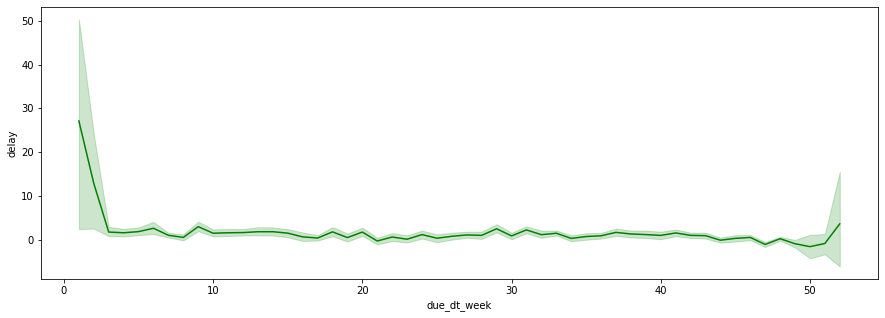

In [72]:
plt.figure(figsize=(15,5))
sns.lineplot(X_train['due_dt_week'],X_train['delay'],color='green')

Text(0.5, 1.0, 'due weekday vs delay')

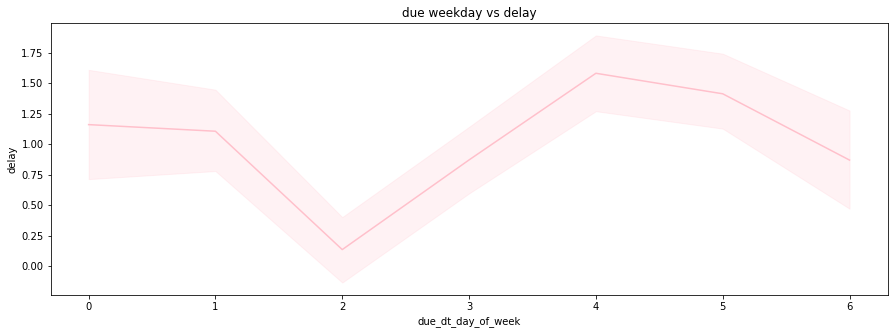

In [73]:
plt.figure(figsize=(15,5))
sns.lineplot(X_train['due_dt_day_of_week'],X_train['delay'],color='pink')
plt.title('due weekday vs delay')

<AxesSubplot:xlabel='due_dt_day', ylabel='delay'>

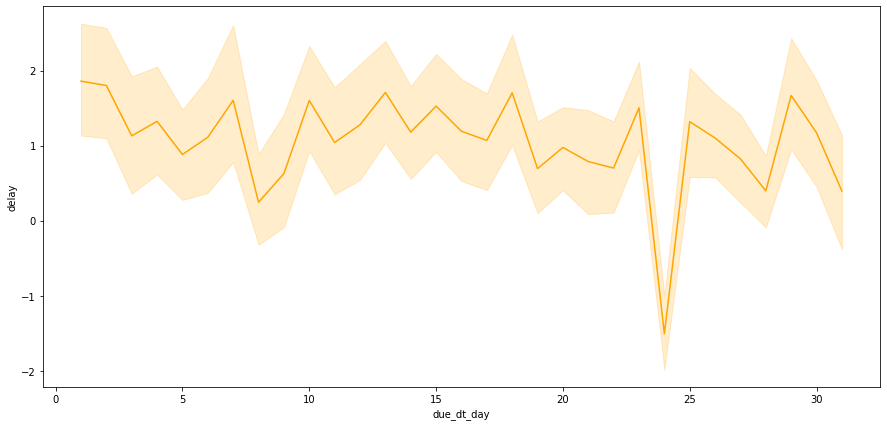

In [74]:
plt.figure(figsize=(15,7))
sns.lineplot(x='due_dt_day',y='delay',data=X_train,color='orange')

In [75]:
X_train.drop('due_dt_day',axis=1,inplace=True)

<AxesSubplot:xlabel='due_dt_mon', ylabel='delay'>

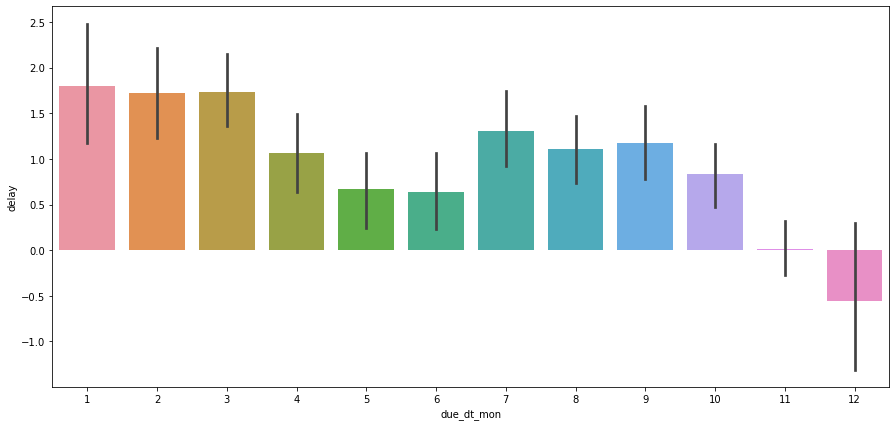

In [76]:
plt.figure(figsize=(15,7))
sns.barplot(x='due_dt_mon',y='delay',data=X_train)


In [77]:
X_train['due_dt_day_of_week'].unique()

array([0, 1, 3, 6, 5, 4, 2], dtype=int64)

In [78]:
X_train['is_weekend']=np.where(X_train['due_dt_day_of_week']>3,1,0)
X_val['is_weekend']=np.where(X_val['due_dt_day_of_week']>3,1,0)
X_test1['is_weekend']=np.where(X_test1['due_dt_day_of_week']>3,1,0)

<AxesSubplot:xlabel='is_weekend', ylabel='delay'>

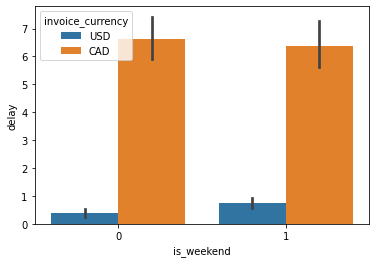

In [79]:

sns.barplot(x='is_weekend',y='delay',data=X_train,hue='invoice_currency')

<AxesSubplot:xlabel='total_open_amount', ylabel='delay'>

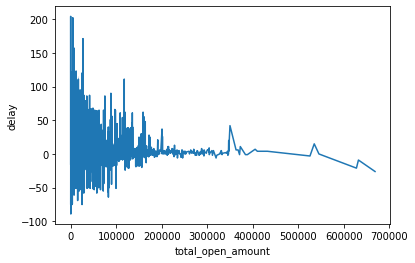

In [80]:
sns.lineplot(x='total_open_amount',y='delay',data=X_train)

In [81]:
data_null['is_weekend']=np.where(data_null['due_dt_day_of_week']>3,1,0)


In [82]:
X_train.drop('delay',axis=1,inplace=True)

#### we cant make any features outof clearing date 
X_train['clr_dt_days']=pd.to_datetime(X_train['clear_date']).dt.day
X_train['clr_dt_mon']=pd.to_datetime(X_train['clear_date']).dt.month
X_train['clr_dt_day_week']=pd.to_datetime(X_train['clear_date']).dt.weekday

In [83]:
X_train

,business_code,cust_number,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,mean_delay,due_dt_week,due_dt_mon,due_dt_day_of_week,is_weekend
0,U001,0200726979,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,RV,58.18,2018-12-30,NAA8,0.956110,3,1,0,0
1,U001,0200769623,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,RV,20695.38,2018-12-30,NAH4,-2.260712,3,1,0,0
2,U001,0200794332,2019-01-23,2019.0,2018-12-30,2019-01-14,USD,RV,8041.59,2018-12-30,NAAX,-0.185131,3,1,0,0
3,U001,0200769623,2019-01-16,2019.0,2018-12-30,2019-01-14,USD,RV,344.91,2018-12-30,NAH4,-2.260712,3,1,0,0
4,U001,0200769623,2019-01-11,2019.0,2018-12-30,2019-01-14,USD,RV,43689.83,2018-12-30,NAH4,-2.260712,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31993,U001,0200785971,2019-12-23,2019.0,2019-11-18,2019-12-20,USD,RV,6985.28,2019-11-18,NA32,1.762712,51,12,4,1
31994,U001,0200782669,2019-12-09,2019.0,2019-11-18,2019-12-03,USD,RV,8649.76,2019-11-18,NAA8,-0.103093,49,12,1,0
31995,U001,0200741831,2019-12-05,2019.0,2019-11-18,2019-12-03,USD,RV,50364.28,2019-11-18,NAA8,3.388889,49,12,1,0
31996,U001,0200726979,2019-12-03,2019.0,2019-11-18,2019-12-03,USD,RV,195.46,2019-11-18,NAA8,0.956110,49,12,1,0


In [84]:
data_null

,business_code,cust_number,buisness_year,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,mean_delay,due_dt_week,due_dt_mon,due_dt_day_of_week,is_weekend
3,CA02,0140105686,2020.0,2020-03-30,2020-04-10,CAD,RV,3299.70,2020-03-31,CA10,6.522124,15,4,4,1
7,U001,0200744019,2020.0,2020-03-19,2020-04-03,USD,RV,11173.02,2020-03-19,NAA8,2.849117,14,4,4,1
10,U001,0200418007,2020.0,2020-03-11,2020-03-26,USD,RV,3525.59,2020-03-11,NAA8,-0.908815,13,3,3,0
14,U001,0200739534,2020.0,2020-04-15,2020-04-30,USD,RV,121105.65,2020-04-15,NAA8,1.759124,18,4,3,0
15,U001,0200353024,2020.0,2020-04-23,2020-04-26,USD,RV,3726.06,2020-04-16,NAM2,-4.152174,17,4,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,2020.0,2020-03-10,2020-03-25,USD,RV,13114.99,2020-03-10,NAH4,-2.260712,13,3,2,0
49980,U001,0200769623,2020.0,2020-05-03,2020-05-18,USD,RV,8899.71,2020-05-03,NAH4,-2.260712,21,5,0,0
49982,U001,0200148860,2020.0,2020-03-11,2020-03-26,USD,RV,4967.06,2020-03-11,NAA8,-5.490099,13,3,3,0
49992,U001,0200900909,2020.0,2020-03-25,2020-04-09,USD,RV,1998.64,2020-03-25,NAA8,1.463768,15,4,3,0


In [85]:
X_train.drop(['due_in_date','clear_date'],axis=1,inplace=True)
X_val.drop(['due_in_date','clear_date'],axis=1,inplace=True)
X_test1.drop(['due_in_date','clear_date'],axis=1,inplace=True)

# we extracted all the information from the due and clear date now we can safely drop them off.

In [86]:
data_null.drop(['due_in_date'],axis=1,inplace=True)

<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

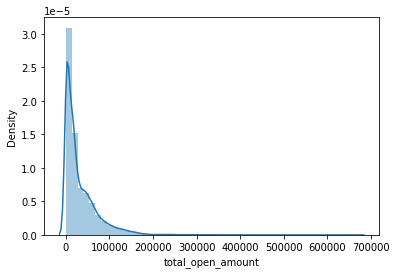

In [87]:
sns.distplot(X_train['total_open_amount'])

#this is highly skewed graph an we cant make much out of it

<AxesSubplot:>

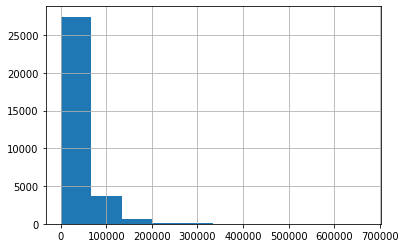

In [88]:
X_train.total_open_amount.hist()
#we cant get much info from here because the scale here is too high 
#so we must perform log normalization on the total open amount to get it into reasonable scale wrt others.

In [89]:
X_train

,business_code,cust_number,buisness_year,document_create_date.1,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,mean_delay,due_dt_week,due_dt_mon,due_dt_day_of_week,is_weekend
0,U001,0200726979,2019.0,2018-12-30,USD,RV,58.18,2018-12-30,NAA8,0.956110,3,1,0,0
1,U001,0200769623,2019.0,2018-12-30,USD,RV,20695.38,2018-12-30,NAH4,-2.260712,3,1,0,0
2,U001,0200794332,2019.0,2018-12-30,USD,RV,8041.59,2018-12-30,NAAX,-0.185131,3,1,0,0
3,U001,0200769623,2019.0,2018-12-30,USD,RV,344.91,2018-12-30,NAH4,-2.260712,3,1,0,0
4,U001,0200769623,2019.0,2018-12-30,USD,RV,43689.83,2018-12-30,NAH4,-2.260712,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31993,U001,0200785971,2019.0,2019-11-18,USD,RV,6985.28,2019-11-18,NA32,1.762712,51,12,4,1
31994,U001,0200782669,2019.0,2019-11-18,USD,RV,8649.76,2019-11-18,NAA8,-0.103093,49,12,1,0
31995,U001,0200741831,2019.0,2019-11-18,USD,RV,50364.28,2019-11-18,NAA8,3.388889,49,12,1,0
31996,U001,0200726979,2019.0,2019-11-18,USD,RV,195.46,2019-11-18,NAA8,0.956110,49,12,1,0


In [90]:
#Converting CAD to USD

X_train['total_open_amount'] = np.where((X_train['invoice_currency'] == "CAD")&(X_train['buisness_year']==2019), X_train['total_open_amount']*0.7538, X_train['total_open_amount'])
X_train['total_open_amount'] = np.where((X_train['invoice_currency'] == "CAD")&(X_train['buisness_year']==2020), X_train['total_open_amount']*0.7461, X_train['total_open_amount'])

In [91]:
X_train

,business_code,cust_number,buisness_year,document_create_date.1,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,mean_delay,due_dt_week,due_dt_mon,due_dt_day_of_week,is_weekend
0,U001,0200726979,2019.0,2018-12-30,USD,RV,58.18,2018-12-30,NAA8,0.956110,3,1,0,0
1,U001,0200769623,2019.0,2018-12-30,USD,RV,20695.38,2018-12-30,NAH4,-2.260712,3,1,0,0
2,U001,0200794332,2019.0,2018-12-30,USD,RV,8041.59,2018-12-30,NAAX,-0.185131,3,1,0,0
3,U001,0200769623,2019.0,2018-12-30,USD,RV,344.91,2018-12-30,NAH4,-2.260712,3,1,0,0
4,U001,0200769623,2019.0,2018-12-30,USD,RV,43689.83,2018-12-30,NAH4,-2.260712,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31993,U001,0200785971,2019.0,2019-11-18,USD,RV,6985.28,2019-11-18,NA32,1.762712,51,12,4,1
31994,U001,0200782669,2019.0,2019-11-18,USD,RV,8649.76,2019-11-18,NAA8,-0.103093,49,12,1,0
31995,U001,0200741831,2019.0,2019-11-18,USD,RV,50364.28,2019-11-18,NAA8,3.388889,49,12,1,0
31996,U001,0200726979,2019.0,2019-11-18,USD,RV,195.46,2019-11-18,NAA8,0.956110,49,12,1,0


In [92]:
#Converting CAD to USD for val

X_val['total_open_amount'] = np.where((X_val['invoice_currency'] == "CAD")&(X_val['buisness_year']==2019), X_val['total_open_amount']*0.7538, X_val['total_open_amount'])
X_val['total_open_amount'] = np.where((X_val['invoice_currency'] == "CAD")&(X_val['buisness_year']==2020), X_val['total_open_amount']*0.7461, X_val['total_open_amount'])

In [93]:
#Converting CAD to USD for test1
X_test1['total_open_amount'] = np.where((X_test1['invoice_currency'] == "CAD")&(X_test1['buisness_year']==2019), X_test1['total_open_amount']*0.7538, X_test1['total_open_amount'])
X_test1['total_open_amount'] = np.where((X_test1['invoice_currency'] == "CAD")&(X_test1['buisness_year']==2020), X_test1['total_open_amount']*0.7461, X_test1['total_open_amount'])

In [94]:
#Converting CAD to USD gor data_null
data_null['total_open_amount'] = np.where((data_null['invoice_currency'] == "CAD")&(data_null['buisness_year']==2019), data_null['total_open_amount']*0.7538, data_null['total_open_amount'])
data_null['total_open_amount'] = np.where((data_null['invoice_currency'] == "CAD")&(data_null['buisness_year']==2020), data_null['total_open_amount']*0.7461, data_null['total_open_amount'])

In [95]:
#although i tried without the currency conversion but the accurarcy was the same.
# there i did binarization since currency column has only 2 values but result was the same.

In [96]:
X_train['total_open_amount'].describe()

count     31998.000000
mean      30783.305644
std       36896.915661
min           0.790000
25%        4518.695000
50%       16894.340000
75%       45452.886625
max      668593.360000
Name: total_open_amount, dtype: float64

In [97]:
X_train['amnt_log']=np.log(X_train['total_open_amount'])
X_train["amnt_log"].describe()

# the total_open_amount has high values and if i give these values to for comparision the computer will assign high priority to total open amount
# that too when it does not deserve it and in the end give wrong prediction
# so it is important to scale the values before giving the dataset for feature selection.

count    31998.000000
mean         9.371086
std          1.779953
min         -0.235722
25%          8.415978
50%          9.734734
75%         10.724432
max         13.412931
Name: amnt_log, dtype: float64

In [98]:
X_test1['amnt_log']=np.log(X_test1['total_open_amount'])
X_val['amnt_log']=np.log(X_val['total_open_amount'])
data_null['amnt_log']=np.log(data_null['total_open_amount'])

In [99]:
data_null['amnt_log'].describe()

count    10000.000000
mean         9.494343
std          1.728369
min         -0.328504
25%          8.632492
50%          9.857523
75%         10.780184
max         13.390319
Name: amnt_log, dtype: float64

In [100]:
X_val['amnt_log'].describe()

count    4000.000000
mean        9.464172
std         1.791714
min         2.530517
25%         8.524999
50%         9.834919
75%        10.795694
max        12.994348
Name: amnt_log, dtype: float64

In [101]:
X_test1["amnt_log"].describe()

count    4000.000000
mean        9.360857
std         1.775481
min         1.736951
25%         8.457711
50%         9.705287
75%        10.717889
max        12.605663
Name: amnt_log, dtype: float64

<AxesSubplot:xlabel='amnt_log', ylabel='delay'>

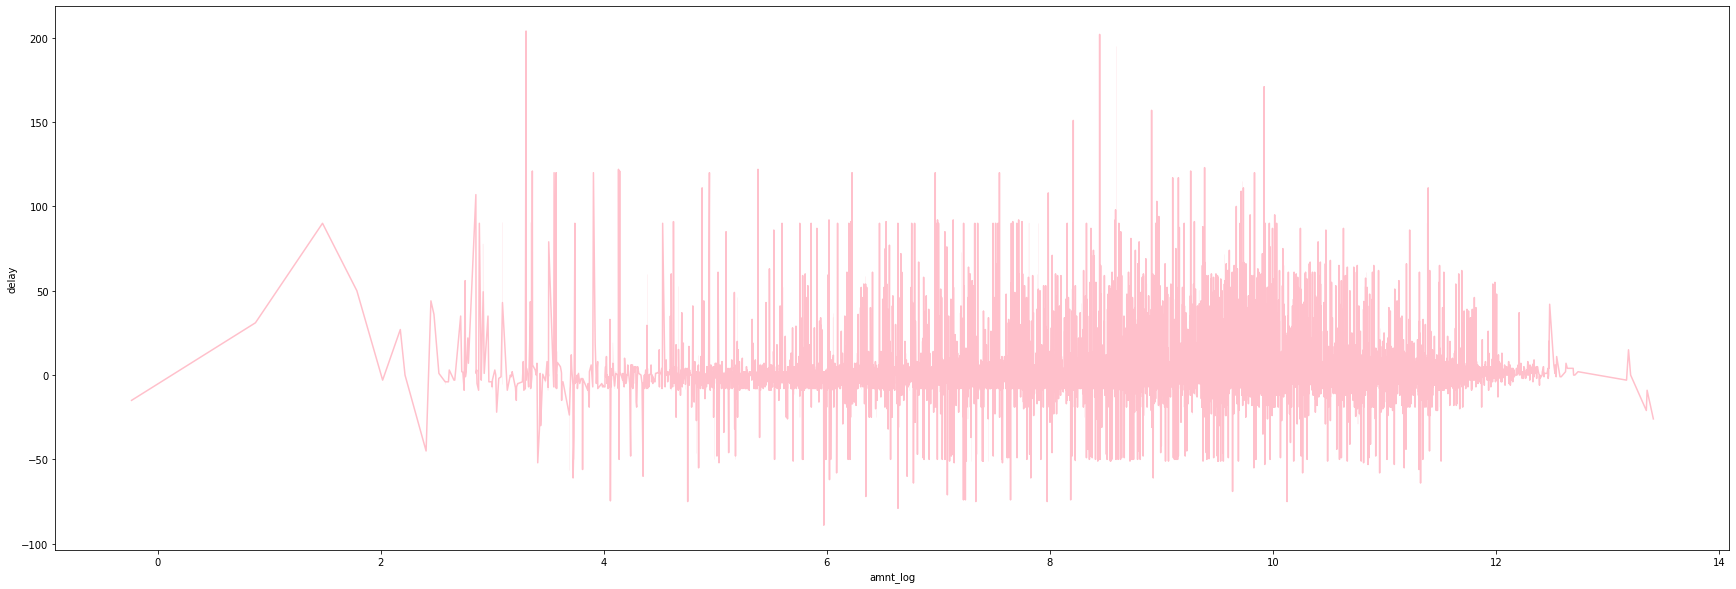

In [102]:
plt.figure(figsize=(30,10))
sns.lineplot(X_train['amnt_log'],y_train,color='pink')


In [103]:
X_train["amnt_log"]=X_train["amnt_log"]+0.4

#since the amount cant be negative so i am adding all the values wiht 0.4 so that the min value(-0.3) will get positive.
#as we cant have amount due in -ves.

X_train.drop("total_open_amount",axis=1,inplace=True)

In [104]:
X_val["amnt_log"]=X_val["amnt_log"]+1.715
X_val.drop("total_open_amount",axis=1,inplace=True)
X_test1.drop("total_open_amount",axis=1,inplace=True)

In [105]:
data_null["amnt_log"]=data_null["amnt_log"]+1.8
#since the amount cant be negative so i am adding all the values wiht 1.8 so that the min value will get positive.
data_null.drop("total_open_amount",axis=1,inplace=True)

Text(0.5, 1.0, 'X_train amount log')

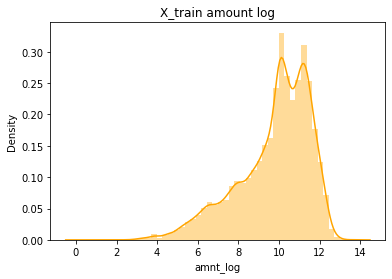

In [106]:
sns.distplot(X_train['amnt_log'],color='orange')
plt.title("X_train amount log")

# this graphs makes more sense than the previous high skewed one.

<AxesSubplot:>

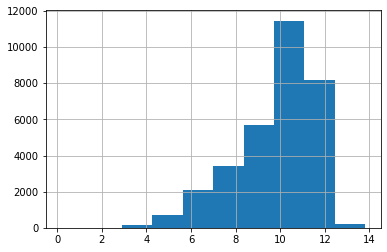

In [107]:
X_train.amnt_log.hist()


Text(0.5, 1.0, 'data_null amount log')

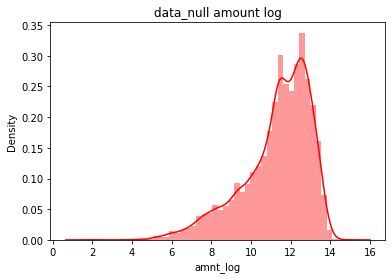

In [108]:
sns.distplot(data_null['amnt_log'],color='red')
plt.title("data_null amount log")

#### Making feature out of cust_payment_terms

In [109]:
X_train['cust_payment_terms'].value_counts()

NAA8    12833
NAH4     8325
CA10     2504
NAC6     1058
NAM4      838
        ...  
NAD8        1
NAV2        1
NABD        1
BR12        1
CA60        1
Name: cust_payment_terms, Length: 69, dtype: int64

In [110]:
#since there are many values with have occurance 1 or low values and if we try to find mean of their occurance then it would be negligible wrt to NAA8 and the others 
# so I am grouping them in a list and later will replace those values with a common one called others

fem=[xdd for xdd in X_train['cust_payment_terms'] if xdd not in ['NAA8','NAH4','CA10','NAC6','NAM4','NAAX']]
fem_val=[xdd1 for xdd1 in X_val['cust_payment_terms'] if xdd1 not in ['NAA8','NAH4','CA10','NAC6','NAM4','NAAX']]
fem_test1=[xdd2 for xdd2 in X_test1['cust_payment_terms'] if xdd2 not in ['NAA8','NAH4','CA10','NAC6','NAM4','NAAX']]

In [111]:
fem_null=[xdd3 for xdd3 in data_null['cust_payment_terms'] if xdd3 not in ['NAA8','NAH4','CA10','NAC6','NAM4','NAAX']]

In [112]:
#replacing the list elements with others
X_train['cust_payment_terms'] = X_train['cust_payment_terms'].replace(fem,'others')
X_val['cust_payment_terms'] = X_val['cust_payment_terms'].replace(fem_val,'others')
X_test1['cust_payment_terms'] = X_test1['cust_payment_terms'].replace(fem_test1,'others')

In [113]:
data_null['cust_payment_terms'] = data_null['cust_payment_terms'].replace(fem_null,'others')

In [114]:
X_train['cust_payment_terms'].value_counts()
#this reduces the total unique values and we can make a feature out of them.

NAA8      12833
NAH4       8325
others     5683
CA10       2504
NAC6       1058
NAM4        838
NAAX        757
Name: cust_payment_terms, dtype: int64

In [115]:
data_null['cust_payment_terms'].value_counts()

NAA8      4102
NAH4      2992
others    1236
CA10       725
NAC6       426
NAM4       273
NAAX       246
Name: cust_payment_terms, dtype: int64

In [116]:

X_train['cust_payment_terms'].value_counts(normalize=True)
#this is giving us mean of each value.

NAA8      0.401056
NAH4      0.260173
others    0.177605
CA10      0.078255
NAC6      0.033065
NAM4      0.026189
NAAX      0.023658
Name: cust_payment_terms, dtype: float64

In [117]:
data_null['cust_payment_terms'].value_counts(normalize=True)


NAA8      0.4102
NAH4      0.2992
others    0.1236
CA10      0.0725
NAC6      0.0426
NAM4      0.0273
NAAX      0.0246
Name: cust_payment_terms, dtype: float64

In [118]:
cus_pay_terms={'NAA8':0.401007,'NAH4':0.297426,'CA10':0.078930,'NAC6':0.035143,'NAM4':0.025179,'NAAX':0.024775,'others':0.174988}
cus_pay_terms

#here i made a list where i inserted value name and the mean of their occurance.
#frequency encoding

{'NAA8': 0.401007,
 'NAH4': 0.297426,
 'CA10': 0.07893,
 'NAC6': 0.035143,
 'NAM4': 0.025179,
 'NAAX': 0.024775,
 'others': 0.174988}

In [119]:
#mapping the list with train,test,val and data_null.

X_train['cust_payment_terms']=X_train['cust_payment_terms'].map(cus_pay_terms)
X_val['cust_payment_terms']=X_val['cust_payment_terms'].map(cus_pay_terms)
X_test1['cust_payment_terms']=X_test1['cust_payment_terms'].map(cus_pay_terms)
data_null['cust_payment_terms']=data_null['cust_payment_terms'].map(cus_pay_terms)

In [120]:
X_train

,business_code,cust_number,buisness_year,document_create_date.1,invoice_currency,document type,baseline_create_date,cust_payment_terms,mean_delay,due_dt_week,due_dt_mon,due_dt_day_of_week,is_weekend,amnt_log
0,U001,0200726979,2019.0,2018-12-30,USD,RV,2018-12-30,0.401007,0.956110,3,1,0,0,4.463542
1,U001,0200769623,2019.0,2018-12-30,USD,RV,2018-12-30,0.297426,-2.260712,3,1,0,0,10.337666
2,U001,0200794332,2019.0,2018-12-30,USD,RV,2018-12-30,0.024775,-0.185131,3,1,0,0,9.392382
3,U001,0200769623,2019.0,2018-12-30,USD,RV,2018-12-30,0.297426,-2.260712,3,1,0,0,6.243284
4,U001,0200769623,2019.0,2018-12-30,USD,RV,2018-12-30,0.297426,-2.260712,3,1,0,0,11.084871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31993,U001,0200785971,2019.0,2019-11-18,USD,RV,2019-11-18,0.174988,1.762712,51,12,4,1,9.251560
31994,U001,0200782669,2019.0,2019-11-18,USD,RV,2019-11-18,0.401007,-0.103093,49,12,1,0,9.465287
31995,U001,0200741831,2019.0,2019-11-18,USD,RV,2019-11-18,0.401007,3.388889,49,12,1,0,11.227037
31996,U001,0200726979,2019.0,2019-11-18,USD,RV,2019-11-18,0.401007,0.956110,49,12,1,0,5.675356


In [121]:
X_train['cust_payment_terms']

0        0.401007
1        0.297426
2        0.024775
3        0.297426
4        0.297426
           ...   
31993    0.174988
31994    0.401007
31995    0.401007
31996    0.401007
31997    0.401007
Name: cust_payment_terms, Length: 31998, dtype: float64

In [122]:
X_train

,business_code,cust_number,buisness_year,document_create_date.1,invoice_currency,document type,baseline_create_date,cust_payment_terms,mean_delay,due_dt_week,due_dt_mon,due_dt_day_of_week,is_weekend,amnt_log
0,U001,0200726979,2019.0,2018-12-30,USD,RV,2018-12-30,0.401007,0.956110,3,1,0,0,4.463542
1,U001,0200769623,2019.0,2018-12-30,USD,RV,2018-12-30,0.297426,-2.260712,3,1,0,0,10.337666
2,U001,0200794332,2019.0,2018-12-30,USD,RV,2018-12-30,0.024775,-0.185131,3,1,0,0,9.392382
3,U001,0200769623,2019.0,2018-12-30,USD,RV,2018-12-30,0.297426,-2.260712,3,1,0,0,6.243284
4,U001,0200769623,2019.0,2018-12-30,USD,RV,2018-12-30,0.297426,-2.260712,3,1,0,0,11.084871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31993,U001,0200785971,2019.0,2019-11-18,USD,RV,2019-11-18,0.174988,1.762712,51,12,4,1,9.251560
31994,U001,0200782669,2019.0,2019-11-18,USD,RV,2019-11-18,0.401007,-0.103093,49,12,1,0,9.465287
31995,U001,0200741831,2019.0,2019-11-18,USD,RV,2019-11-18,0.401007,3.388889,49,12,1,0,11.227037
31996,U001,0200726979,2019.0,2019-11-18,USD,RV,2019-11-18,0.401007,0.956110,49,12,1,0,5.675356


In [123]:
#dropping these values because i can't file them of any use

X_train.drop(['baseline_create_date','document_create_date.1','buisness_year'],axis=1,inplace=True)
X_val.drop(['baseline_create_date','document_create_date.1','buisness_year'],axis=1,inplace=True)
X_test1.drop(['baseline_create_date','document_create_date.1','buisness_year'],axis=1,inplace=True)
data_null.drop(['baseline_create_date','document_create_date.1','buisness_year'],axis=1,inplace=True)

#### making feature out of business code using frequency encoding

In [124]:
X_train['business_code'].value_counts()

#here i can see that below 3 values are having very less occrance in the table so ill group them in a category called others.

U001    28863
CA02     2594
U013      423
U002      105
U005        9
U007        4
Name: business_code, dtype: int64

X_train=pd.concat([X_train,pd.get_dummies(X_train['business_code'])],axis=1)

i tried using dummy variable but it will increase my features by 6 columns and dimensionality will also be a problem btw train and test sets.

In [125]:
X_train['business_code'].value_counts(normalize=True)
#normalize return proportion 
#ie U001 is at 90% etc...

U001    0.902025
CA02    0.081068
U013    0.013220
U002    0.003281
U005    0.000281
U007    0.000125
Name: business_code, dtype: float64

In [126]:
# here i did the same thing which I did with cust_payment_terms.
# categorizing low freq values in others category

In [127]:
X_train['business_code'] = X_train['business_code'].replace(['U002','U005','U007','U013'],'others')

X_val['business_code'] = X_val['business_code'].replace(['U002','U005','U007','U013'],'others')

X_test1['business_code'] = X_test1['business_code'].replace(['U002','U005','U007','U013'],'others')

In [128]:
data_null['business_code'] = data_null['business_code'].replace(['U002','U005','U007','U013'],'others')


In [129]:
X_train['business_code'].value_counts(normalize=True)

U001      0.902025
CA02      0.081068
others    0.016907
Name: business_code, dtype: float64

In [130]:
buss_code={'U001':0.900517,
'CA02':0.081116,
'others':0.018367
}

#dictionary which can be used for mapping which will reduce labour.

In [131]:
X_train['business_code']=X_train['business_code'].map(buss_code)
X_train

,business_code,cust_number,invoice_currency,document type,cust_payment_terms,mean_delay,due_dt_week,due_dt_mon,due_dt_day_of_week,is_weekend,amnt_log
0,0.900517,0200726979,USD,RV,0.401007,0.956110,3,1,0,0,4.463542
1,0.900517,0200769623,USD,RV,0.297426,-2.260712,3,1,0,0,10.337666
2,0.900517,0200794332,USD,RV,0.024775,-0.185131,3,1,0,0,9.392382
3,0.900517,0200769623,USD,RV,0.297426,-2.260712,3,1,0,0,6.243284
4,0.900517,0200769623,USD,RV,0.297426,-2.260712,3,1,0,0,11.084871
...,...,...,...,...,...,...,...,...,...,...,...
31993,0.900517,0200785971,USD,RV,0.174988,1.762712,51,12,4,1,9.251560
31994,0.900517,0200782669,USD,RV,0.401007,-0.103093,49,12,1,0,9.465287
31995,0.900517,0200741831,USD,RV,0.401007,3.388889,49,12,1,0,11.227037
31996,0.900517,0200726979,USD,RV,0.401007,0.956110,49,12,1,0,5.675356


In [132]:
data_null['business_code']=data_null['business_code'].map(buss_code)
X_test1['business_code']=X_test1['business_code'].map(buss_code)
X_val['business_code']=X_val['business_code'].map(buss_code)

In [133]:
X_train

,business_code,cust_number,invoice_currency,document type,cust_payment_terms,mean_delay,due_dt_week,due_dt_mon,due_dt_day_of_week,is_weekend,amnt_log
0,0.900517,0200726979,USD,RV,0.401007,0.956110,3,1,0,0,4.463542
1,0.900517,0200769623,USD,RV,0.297426,-2.260712,3,1,0,0,10.337666
2,0.900517,0200794332,USD,RV,0.024775,-0.185131,3,1,0,0,9.392382
3,0.900517,0200769623,USD,RV,0.297426,-2.260712,3,1,0,0,6.243284
4,0.900517,0200769623,USD,RV,0.297426,-2.260712,3,1,0,0,11.084871
...,...,...,...,...,...,...,...,...,...,...,...
31993,0.900517,0200785971,USD,RV,0.174988,1.762712,51,12,4,1,9.251560
31994,0.900517,0200782669,USD,RV,0.401007,-0.103093,49,12,1,0,9.465287
31995,0.900517,0200741831,USD,RV,0.401007,3.388889,49,12,1,0,11.227037
31996,0.900517,0200726979,USD,RV,0.401007,0.956110,49,12,1,0,5.675356


In [134]:
data_null

,business_code,cust_number,invoice_currency,document type,cust_payment_terms,mean_delay,due_dt_week,due_dt_mon,due_dt_day_of_week,is_weekend,amnt_log
3,0.081116,0140105686,CAD,RV,0.078930,6.522124,15,4,4,1,9.608691
7,0.900517,0200744019,USD,RV,0.401007,2.849117,14,4,4,1,11.121257
10,0.900517,0200418007,USD,RV,0.401007,-0.908815,13,3,3,0,9.967803
14,0.900517,0200739534,USD,RV,0.401007,1.759124,18,4,3,0,13.504419
15,0.900517,0200353024,USD,RV,0.174988,-4.152174,17,4,6,1,10.023107
...,...,...,...,...,...,...,...,...,...,...,...
49975,0.900517,0200769623,USD,RV,0.297426,-2.260712,13,3,2,0,11.281511
49980,0.900517,0200769623,USD,RV,0.297426,-2.260712,21,5,0,0,10.893774
49982,0.900517,0200148860,USD,RV,0.401007,-5.490099,13,3,3,0,10.310583
49992,0.900517,0200900909,USD,RV,0.401007,1.463768,15,4,3,0,9.400222


#### checking the dimension of all the datasets before moving forward

In [135]:
X_train.shape, X_test1.shape , X_val.shape , data_null.shape

((31998, 11), (4000, 11), (4000, 11), (10000, 11))

#### making a feature out of document type using binarization

In [136]:
X_train['doc_type']=np.where(X_train['document type']=="RV",1,0)
X_train.drop("document type",axis=1,inplace=True)

X_val['doc_type']=np.where(X_val['document type']=="RV",1,0)
X_val.drop("document type",axis=1,inplace=True)

X_test1['doc_type']=np.where(X_test1['document type']=="RV",1,0)
X_test1.drop("document type",axis=1,inplace=True)

data_null['doc_type']=np.where(data_null['document type']=="RV",1,0)
data_null.drop("document type",axis=1,inplace=True)

In [137]:
X_train['invoice_currency'].value_counts()

USD    29403
CAD     2595
Name: invoice_currency, dtype: int64

In [138]:
# Earlier i tried binariztion with invoive currency too

'''X_train['invoice_currency']=np.where(X_train['invoice_currency']=="USD",1,0)

X_val['invoice_currency']=np.where(X_val['invoice_currency']=="USD",1,0)

X_test1['invoice_currency']=np.where(X_test1['invoice_currency']=="USD",1,0)
'''

'X_train[\'invoice_currency\']=np.where(X_train[\'invoice_currency\']=="USD",1,0)\n\nX_val[\'invoice_currency\']=np.where(X_val[\'invoice_currency\']=="USD",1,0)\n\nX_test1[\'invoice_currency\']=np.where(X_test1[\'invoice_currency\']=="USD",1,0)\n'

In [139]:
'''data_null['invoice_currency']=np.where(data_null['invoice_currency']=="USD",1,0)
'''

'data_null[\'invoice_currency\']=np.where(data_null[\'invoice_currency\']=="USD",1,0)\n'

In [140]:
X_train.shape

(31998, 11)

In [141]:
# dropping customer number because i took out the mean delay with its help and now i dont need it anymore

In [142]:
X_train.drop("cust_number",axis=1,inplace=True)
X_val.drop("cust_number",axis=1,inplace=True)
X_test1.drop("cust_number",axis=1,inplace=True)
data_null.drop("cust_number",axis=1,inplace=True)

In [143]:
# after currency conversion this column makes no sense so i am dropping it off

In [144]:
X_train.drop("invoice_currency",axis=1,inplace=True)
X_val.drop("invoice_currency",axis=1,inplace=True)
X_test1.drop("invoice_currency",axis=1,inplace=True)

data_null.drop("invoice_currency",axis=1,inplace=True)

In [145]:
X_train

,business_code,cust_payment_terms,mean_delay,due_dt_week,due_dt_mon,due_dt_day_of_week,is_weekend,amnt_log,doc_type
0,0.900517,0.401007,0.956110,3,1,0,0,4.463542,1
1,0.900517,0.297426,-2.260712,3,1,0,0,10.337666,1
2,0.900517,0.024775,-0.185131,3,1,0,0,9.392382,1
3,0.900517,0.297426,-2.260712,3,1,0,0,6.243284,1
4,0.900517,0.297426,-2.260712,3,1,0,0,11.084871,1
...,...,...,...,...,...,...,...,...,...
31993,0.900517,0.174988,1.762712,51,12,4,1,9.251560,1
31994,0.900517,0.401007,-0.103093,49,12,1,0,9.465287,1
31995,0.900517,0.401007,3.388889,49,12,1,0,11.227037,1
31996,0.900517,0.401007,0.956110,49,12,1,0,5.675356,1


# Feature Selection

#### applying filter method

In [146]:
from sklearn.feature_selection import VarianceThreshold
#Passing a value of zero for the parameter will filter all the features with zero variance
constant_filter = VarianceThreshold(threshold=0)
#we need to simply apply this filter to our training set as shown in the following example
constant_filter.fit(X_train)
#the number of non-constant features.
len(X_train.columns[constant_filter.get_support()])



9

In [147]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]

print(len(constant_columns))

#this shows we dont have any constant columns

0


#### Correlation Coefficient

<AxesSubplot:>

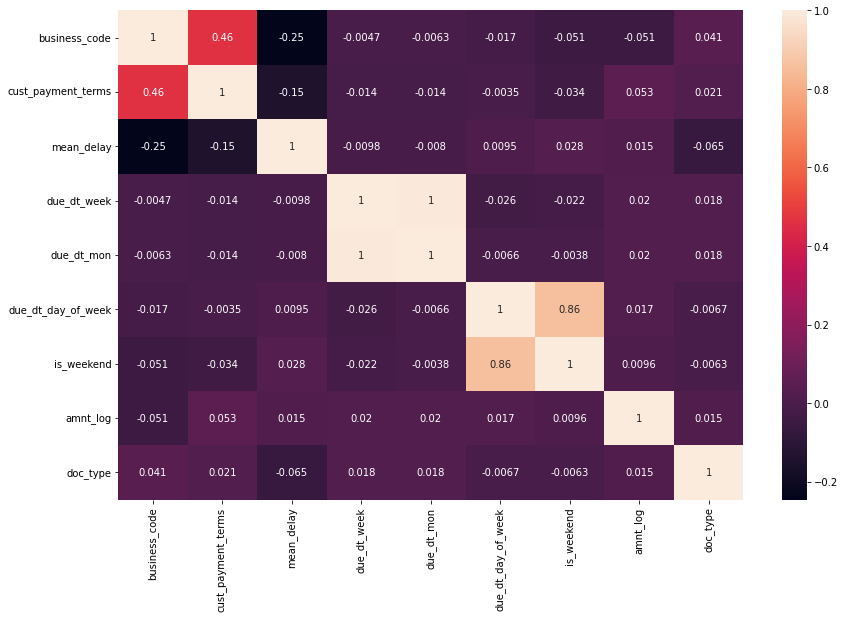

In [148]:
train=X_train.copy()
corr=train.corr()
plt.figure(figsize=(14,9))
sns.heatmap(corr,annot=True)

In [149]:
#after reading the heat map we can drop either of due_dt_week or due_dt_mon
#because of their high correlation but ill do that later.

#### EMBEDDED METHOD

In [150]:
#this will tell us the feature importance of our model

def tree_based_feature_importance(x_train,y_train):
    from sklearn.ensemble import RandomForestRegressor
    # create the random forest model
    model = RandomForestRegressor(n_estimators=120)

    # fit the model to start training.
    model.fit(X_train, y_train)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": X_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=X_train.columns).nlargest(6).plot(kind='barh')  
    return final_df



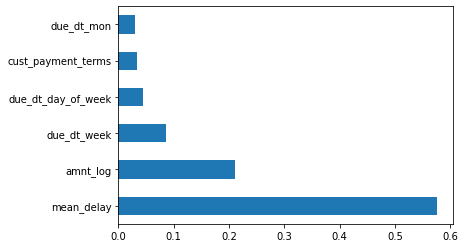

In [151]:
feature_importance=tree_based_feature_importance(X_train,y_train)

In [152]:
display(feature_importance)

,Features,Importances
2,mean_delay,0.576168
7,amnt_log,0.211288
3,due_dt_week,0.085668
5,due_dt_day_of_week,0.043874
1,cust_payment_terms,0.034404
4,due_dt_mon,0.029692
0,business_code,0.009891
6,is_weekend,0.007516
8,doc_type,0.001500


In [153]:
X_train.describe()

,business_code,cust_payment_terms,mean_delay,due_dt_week,due_dt_mon,due_dt_day_of_week,is_weekend,amnt_log,doc_type
count,31998.000000,31998.000000,31998.000000,31998.000000,31998.000000,31998.000000,31998.000000,31998.000000,31998.000000
mean,0.819175,0.277871,1.025220,26.138477,6.392306,3.081568,0.438121,9.771086,0.999812
std,0.246927,0.127647,7.702941,13.201198,3.043652,1.884922,0.496164,1.779953,0.013692
min,0.018367,0.024775,-71.000000,1.000000,1.000000,0.000000,0.000000,0.164278,0.000000
25%,0.900517,0.174988,-2.260712,15.000000,4.000000,2.000000,0.000000,8.815978,1.000000
50%,0.900517,0.297426,0.349733,26.000000,6.000000,3.000000,0.000000,10.134734,1.000000
75%,0.900517,0.401007,1.704000,38.000000,9.000000,5.000000,1.000000,11.124432,1.000000
max,0.900517,0.401007,195.000000,52.000000,12.000000,6.000000,1.000000,13.812931,1.000000


#### checking for any null values in our datasets before feeding it to the models

In [154]:
X_train.isnull().sum() , X_val.isnull().sum() , X_test1.isnull().sum()

(business_code         0
 cust_payment_terms    0
 mean_delay            0
 due_dt_week           0
 due_dt_mon            0
 due_dt_day_of_week    0
 is_weekend            0
 amnt_log              0
 doc_type              0
 dtype: int64,
 business_code         0
 cust_payment_terms    0
 mean_delay            0
 due_dt_week           0
 due_dt_mon            0
 due_dt_day_of_week    0
 is_weekend            0
 amnt_log              0
 doc_type              0
 dtype: int64,
 business_code         0
 cust_payment_terms    0
 mean_delay            0
 due_dt_week           0
 due_dt_mon            0
 due_dt_day_of_week    0
 is_weekend            0
 amnt_log              0
 doc_type              0
 dtype: int64)

In [155]:
X_train.drop(["doc_type",'is_weekend'],axis=1,inplace=True)
X_val.drop(["doc_type",'is_weekend'],axis=1,inplace=True)
X_test1.drop(["doc_type",'is_weekend'],axis=1,inplace=True)

In [156]:
data_null.drop(["doc_type",'is_weekend'],axis=1,inplace=True)

#   *********** Testing and Predictions ***********

In [157]:
# Modeling & Accuracy Metrics
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### **1. Linear Regression**

In [158]:
# for X_val

clf = LinearRegression()
clf.fit(X_train, y_train)

# Predicting the Test Set Results
predicted = np.floor(clf.predict(X_val))

print(predicted)

[ 1. -3.  0. ...  2.  3.  3.]


In [159]:
y_val

31998      0
31999     -1
32000      0
32001      1
32002     -4
        ... 
35993     -5
35994     45
35995    114
35996      6
35997      0
Name: delay, Length: 4000, dtype: int64

In [160]:

MSE_Score=mean_squared_error(y_val, predicted)
R2_Score=r2_score(y_val, predicted)
print(MSE_Score,R2_Score)

49.43425 0.29683755529108213


In [161]:

rmse=np.sqrt(mean_squared_error(y_val,predicted))
rmse

7.0309494380204445

In [162]:
# for local test1 

clf = LinearRegression()
clf.fit(X_train, y_train)

# Predicting the Test Set Results
predicted1 = np.floor(clf.predict(X_test1))
import math
print(predicted1)
print('')
linear_accuracy = round(clf.score(X_train,y_train)*100,2)
print('accuracy : %.2f' % round(linear_accuracy,2),'%')


[-3.  1. -5. ...  0.  2.  1.]

accuracy : 48.51 %


In [163]:
MSE_Score=mean_squared_error(y_test1, predicted1)
R2_Score=r2_score(y_test1, predicted1)
print(MSE_Score)
print(R2_Score)

69.34775
0.3839502219715579


In [164]:
rmse=np.sqrt(mean_squared_error(y_test1,predicted1))
rmse

8.327529645699258

### **2. Gradient Boosting Regression**

In [165]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


GBR_model = GradientBoostingRegressor(n_estimators=100, max_depth=4)
GBR_model.fit(X_train, y_train)
y_pred2 = GBR_model.predict(X_test1)
GBR_model_accuracy = round(GBR_model.score(X_train,y_train)*100,2)
print(round(GBR_model_accuracy,2),'%')

59.8 %


In [166]:
mean_squared_error(y_test1,y_pred2)

70.04033730865633

### 3. Random Forest Regression

In [167]:
random_model = RandomForestRegressor(n_estimators=120)
random_model.fit(X_train, y_train)
y_pred3 = random_model.predict(X_test1)
random_model_accuracy = round(random_model.score(X_train,y_train)*100,2)
print(round(random_model_accuracy,2),'%')

93.2 %


In [168]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test1, y_test1)

NameError: name 'rf_random' is not defined

##### Hyperparameter Tuning

In [169]:
random_model = RandomForestRegressor(n_estimators=1000, max_depth=150 , random_state=1)
random_model.fit(X_val, y_val)
y_pro = random_model.predict(X_test1)
random_model_accuracy = round(random_model.score(X_val,y_val)*100,2)
print(round(random_model_accuracy,2),'%')

# 94.14% was the highest i achieved but it kept changing so i applied random state on the next highest value.


92.71 %


In [170]:
y_pred3

array([ -2.25      ,   0.05      , -14.90833333, ...,   5.55      ,
         2.75      ,   2.775     ])

In [171]:
MSE_Score1=mean_squared_error(y_test1,  y_pred3)
R2_Score1=r2_score(y_test1, y_pred3)
print(MSE_Score1)
print(R2_Score1)

75.1261899201092
0.3326175308585231


In [172]:
random_model = RandomForestRegressor(n_estimators=120)
random_model.fit(X_train, y_train)
y_val_pred = random_model.predict(X_val)
random_model_accuracy = round(random_model.score(X_train,y_train)*100,2)
print(round(random_model_accuracy,2),'%')

93.29 %


In [173]:
y_val_pred

array([ 1.675     , -1.05833333,  0.875     , ...,  6.29166667,
        3.94166667,  4.675     ])

In [174]:
Y_valpred=y_val.copy()
Y_valpred=pd.DataFrame(Y_valpred)

In [175]:
Y_valpred['predicted']=np.floor(pd.Series(y_val_pred, Y_valpred.index))

In [176]:
Y_valpred

,delay,predicted
31998,0,1.0
31999,-1,-2.0
32000,0,0.0
32001,1,2.0
32002,-4,-3.0
...,...,...
35993,-5,-5.0
35994,45,45.0
35995,114,6.0
35996,6,3.0


In [177]:
def act_decile (x):
   
    if x <= 15: return "0-15 days"
    elif x <= 30: return "15-30 days"
    elif x <= 45: return "30-45 days"
    elif x <= 60: return "45-60 days"
    else: return "60+ days"
    
Y_valpred['age_bin'] = Y_valpred['predicted'].apply(act_decile)

In [178]:
Y_valpred

,delay,predicted,age_bin
31998,0,1.0,0-15 days
31999,-1,-2.0,0-15 days
32000,0,0.0,0-15 days
32001,1,2.0,0-15 days
32002,-4,-3.0,0-15 days
...,...,...,...
35993,-5,-5.0,0-15 days
35994,45,45.0,30-45 days
35995,114,6.0,0-15 days
35996,6,3.0,0-15 days


In [179]:
Y_testpred=y_test1.copy()
Y_testpred=pd.DataFrame(Y_testpred)

In [180]:
Y_testpred['predicted']=np.floor(pd.Series(y_pred3, Y_testpred.index))

In [181]:
Y_testpred

,delay,predicted
35998,-2,-3.0
35999,3,0.0
36000,-7,-15.0
36001,0,0.0
36002,-2,0.0
...,...,...
39993,4,0.0
39994,-50,-2.0
39995,6,5.0
39996,3,2.0


In [182]:

Y_testpred['age_bin'] = Y_testpred['predicted'].apply(act_decile)


In [183]:
Y_testpred

,delay,predicted,age_bin
35998,-2,-3.0,0-15 days
35999,3,0.0,0-15 days
36000,-7,-15.0,0-15 days
36001,0,0.0,0-15 days
36002,-2,0.0,0-15 days
...,...,...,...
39993,4,0.0,0-15 days
39994,-50,-2.0,0-15 days
39995,6,5.0,0-15 days
39996,3,2.0,0-15 days


Text(0.5, 1.0, 'prediction density')

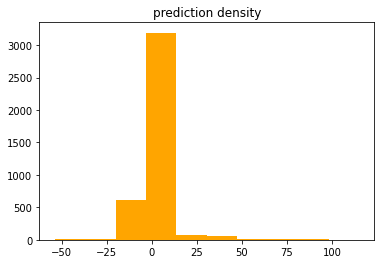

In [184]:
plt.hist(Y_testpred['predicted'],color='orange')
plt.title("prediction density")

### now lets predict the clear date of those null values

In [185]:
random_model = RandomForestRegressor(n_estimators=120)
random_model.fit(X_train, y_train)
y_null_pred = random_model.predict(data_null)
random_model_accuracy = round(random_model.score(X_train,y_train)*100,2)
print(round(random_model_accuracy,2),'%')

93.24 %


In [186]:
y_null_pred

array([ 5.98333333,  2.25      ,  2.80833333, ..., -0.6       ,
        3.1       , -0.2       ])

In [187]:

y_null_pred=np.round(pd.DataFrame(y_null_pred))

In [188]:
y_null_pred

,0
0,6.0
1,2.0
2,3.0
3,7.0
4,-0.0
...,...
9995,-4.0
9996,-3.0
9997,-1.0
9998,3.0


In [189]:
y_null_pred=y_null_pred.rename(columns={0:'predicted'})
y_null_pred

,predicted
0,6.0
1,2.0
2,3.0
3,7.0
4,-0.0
...,...
9995,-4.0
9996,-3.0
9997,-1.0
9998,3.0


In [190]:
y_null_pred['age_bin'] =y_null_pred['predicted'].apply(act_decile)

In [191]:
y_null_pred

,predicted,age_bin
0,6.0,0-15 days
1,2.0,0-15 days
2,3.0,0-15 days
3,7.0,0-15 days
4,-0.0,0-15 days
...,...,...
9995,-4.0,0-15 days
9996,-3.0,0-15 days
9997,-1.0,0-15 days
9998,3.0,0-15 days


In [192]:
data_nat
#this is acopy of data_null(data with null clear dates) which i made above

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
7,U001,0200744019,TARG us,NaN,2020.0,1.930659e+09,2020-03-19,20200318,20200319,20200403.0,USD,RV,1.0,NaN,11173.02,20200319.0,NAA8,1.930659e+09,1
10,U001,0200418007,AM,NaN,2020.0,1.930611e+09,2020-03-11,20200306,20200311,20200326.0,USD,RV,1.0,NaN,3525.59,20200311.0,NAA8,1.930611e+09,1
14,U001,0200739534,OK systems,NaN,2020.0,1.930788e+09,2020-04-15,20200415,20200415,20200430.0,USD,RV,1.0,NaN,121105.65,20200415.0,NAA8,1.930788e+09,1
15,U001,0200353024,DECA corporation,NaN,2020.0,1.930817e+09,2020-04-23,20200423,20200423,20200426.0,USD,RV,1.0,NaN,3726.06,20200416.0,NAM2,1.930817e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930625e+09,2020-03-10,20200309,20200310,20200325.0,USD,RV,1.0,NaN,13114.99,20200310.0,NAH4,1.930625e+09,1
49980,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930851e+09,2020-05-03,20200502,20200503,20200518.0,USD,RV,1.0,NaN,8899.71,20200503.0,NAH4,1.930851e+09,1
49982,U001,0200148860,DOLLA co,NaN,2020.0,1.930638e+09,2020-03-11,20200311,20200311,20200326.0,USD,RV,1.0,NaN,4967.06,20200311.0,NAA8,1.930638e+09,1
49992,U001,0200900909,SYSCO co,NaN,2020.0,1.930702e+09,2020-03-25,20200325,20200325,20200409.0,USD,RV,1.0,NaN,1998.64,20200325.0,NAA8,1.930702e+09,1


In [193]:
# i am making another copy so that if anything goes wrong with dataa then i wont have to rerun the whole code
dataa=data_nat.copy()
dataa

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
7,U001,0200744019,TARG us,NaN,2020.0,1.930659e+09,2020-03-19,20200318,20200319,20200403.0,USD,RV,1.0,NaN,11173.02,20200319.0,NAA8,1.930659e+09,1
10,U001,0200418007,AM,NaN,2020.0,1.930611e+09,2020-03-11,20200306,20200311,20200326.0,USD,RV,1.0,NaN,3525.59,20200311.0,NAA8,1.930611e+09,1
14,U001,0200739534,OK systems,NaN,2020.0,1.930788e+09,2020-04-15,20200415,20200415,20200430.0,USD,RV,1.0,NaN,121105.65,20200415.0,NAA8,1.930788e+09,1
15,U001,0200353024,DECA corporation,NaN,2020.0,1.930817e+09,2020-04-23,20200423,20200423,20200426.0,USD,RV,1.0,NaN,3726.06,20200416.0,NAM2,1.930817e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930625e+09,2020-03-10,20200309,20200310,20200325.0,USD,RV,1.0,NaN,13114.99,20200310.0,NAH4,1.930625e+09,1
49980,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930851e+09,2020-05-03,20200502,20200503,20200518.0,USD,RV,1.0,NaN,8899.71,20200503.0,NAH4,1.930851e+09,1
49982,U001,0200148860,DOLLA co,NaN,2020.0,1.930638e+09,2020-03-11,20200311,20200311,20200326.0,USD,RV,1.0,NaN,4967.06,20200311.0,NAA8,1.930638e+09,1
49992,U001,0200900909,SYSCO co,NaN,2020.0,1.930702e+09,2020-03-25,20200325,20200325,20200409.0,USD,RV,1.0,NaN,1998.64,20200325.0,NAA8,1.930702e+09,1


In [194]:
new=y_null_pred['predicted']
new

0       6.0
1       2.0
2       3.0
3       7.0
4      -0.0
       ... 
9995   -4.0
9996   -3.0
9997   -1.0
9998    3.0
9999   -0.0
Name: predicted, Length: 10000, dtype: float64

In [195]:
dataa['due_in_date']=dataa['due_in_date'].astype('int')

In [196]:
dataa['due_in_date']=dataa['due_in_date'].astype('str')

In [197]:
dataa['due_in_date']=pd.to_datetime(dataa['due_in_date'],format='%Y-%m-%d').dt.date

In [198]:
dataa.reset_index(drop=True,inplace=True)
#resetting the index before appending new data

In [199]:
dataa['y_pred_days']=new
dataa

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,y_pred_days
0,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,2020-04-10,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1,6.0
1,U001,0200744019,TARG us,NaN,2020.0,1.930659e+09,2020-03-19,20200318,20200319,2020-04-03,USD,RV,1.0,NaN,11173.02,20200319.0,NAA8,1.930659e+09,1,2.0
2,U001,0200418007,AM,NaN,2020.0,1.930611e+09,2020-03-11,20200306,20200311,2020-03-26,USD,RV,1.0,NaN,3525.59,20200311.0,NAA8,1.930611e+09,1,3.0
3,U001,0200739534,OK systems,NaN,2020.0,1.930788e+09,2020-04-15,20200415,20200415,2020-04-30,USD,RV,1.0,NaN,121105.65,20200415.0,NAA8,1.930788e+09,1,7.0
4,U001,0200353024,DECA corporation,NaN,2020.0,1.930817e+09,2020-04-23,20200423,20200423,2020-04-26,USD,RV,1.0,NaN,3726.06,20200416.0,NAM2,1.930817e+09,1,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930625e+09,2020-03-10,20200309,20200310,2020-03-25,USD,RV,1.0,NaN,13114.99,20200310.0,NAH4,1.930625e+09,1,-4.0
9996,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930851e+09,2020-05-03,20200502,20200503,2020-05-18,USD,RV,1.0,NaN,8899.71,20200503.0,NAH4,1.930851e+09,1,-3.0
9997,U001,0200148860,DOLLA co,NaN,2020.0,1.930638e+09,2020-03-11,20200311,20200311,2020-03-26,USD,RV,1.0,NaN,4967.06,20200311.0,NAA8,1.930638e+09,1,-1.0
9998,U001,0200900909,SYSCO co,NaN,2020.0,1.930702e+09,2020-03-25,20200325,20200325,2020-04-09,USD,RV,1.0,NaN,1998.64,20200325.0,NAA8,1.930702e+09,1,3.0


In [200]:
#here i am converting the predicted days to a datetime datatype so that it can be added to another datetime datatype

dataa['y_pred_days']=pd.to_timedelta(dataa['y_pred_days'], unit='D')
dataa.drop('clear_date',axis=1,inplace=True)

In [201]:

dataa['predicted_clear_date']=dataa['due_in_date']+ dataa['y_pred_days']
dataa['predicted_clear_date']=pd.to_datetime(dataa['predicted_clear_date']).dt.date


In [202]:
binn=y_null_pred['age_bin']
binn

0       0-15 days
1       0-15 days
2       0-15 days
3       0-15 days
4       0-15 days
          ...    
9995    0-15 days
9996    0-15 days
9997    0-15 days
9998    0-15 days
9999    0-15 days
Name: age_bin, Length: 10000, dtype: object

In [203]:
#also appending age bin the out final result

dataa['age_bin']=binn

# ********* FINAL RESULT *********

In [204]:
dataa.to_csv(r'finalResult.csv')

# **********Thank You for Viewing*************